In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)

    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct: # to remove stop words and punctuations
            continue
        filtered_tokens.append(token.lemma_) # to get base text

    return " ".join(filtered_tokens)

2023-05-24 08:59:54.615061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Bag of n_grams: Exercise
* Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

* Fake news spreads faster than Real news and creates problems and fear among groups and in society.

* We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

* You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

* Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

#### About Data: Fake News Detection
Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
* This data consists of two columns. - Text - label

* Text is the statements or messages regarding a particular event/situation.

* label feature tells whether the given Text is Fake or Real.

* As there are only 2 classes, this problem comes under the Binary Classification.

In [3]:
#import pandas library
import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("Fake_Real_Data.csv")


#print the shape of dataframe
print(df.shape)


#print top 5 rows
df.head()

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [4]:
#check the distribution of labels 
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [5]:
# balance labels
min_samples = 4900
df_fake = df[df.label=="Fake"].sample(min_samples, random_state=2000)
df_real = df[df.label=="Real"].sample(min_samples, random_state=2000)

# add to the row values
df_balanced = pd.concat([df_fake, df_real], axis=0)
df_balanced.label.value_counts()

# print head
df_balanced.head()

,Text,label
799,Trump Spokesman Reveals ASTONISHINGLY Racist ...,Fake
2833,Mike Pence Hilariously Claims There’s No Basi...,Fake
4042,Trump Erupts During Speech To ‘Honor’ Veteran...,Fake
4723,Libertarian Candidate Gary Johnson STUNS Amer...,Fake
2155,Trump Just Started Following ‘Emergency Kitte...,Fake


In [6]:
# print new value count
df_balanced.label.value_counts()

Fake    4900
Real    4900
Name: label, dtype: int64

In [7]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df_balanced['label_num'] = df_balanced.label.map({
    'Fake': 0,
    'Real': 1,
})

#check the results with top 5 rows
df_balanced.head()

,Text,label,label_num
799,Trump Spokesman Reveals ASTONISHINGLY Racist ...,Fake,0
2833,Mike Pence Hilariously Claims There’s No Basi...,Fake,0
4042,Trump Erupts During Speech To ‘Honor’ Veteran...,Fake,0
4723,Libertarian Candidate Gary Johnson STUNS Amer...,Fake,0
2155,Trump Just Started Following ‘Emergency Kitte...,Fake,0


### Modelling without Pre-processing Text data

In [8]:
#import train-test-split from sklearn 
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
x_train, x_test, y_train, y_test = train_test_split(
    df_balanced.Text,
    df_balanced.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.label_num
)

In [9]:
#print the shapes of X_train and X_test
print(x_train.shape, x_test.shape)

(7840,) (1960,)


**Attempt 1 :**

1. using sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

* using CountVectorizer with unigram, bigram, and trigrams.
* use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
* print the classification report.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [15]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])


#2. fit with X_train and y_train
clf.fit(x_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.49      0.65       980
           1       0.66      0.98      0.79       980

    accuracy                           0.74      1960
   macro avg       0.81      0.74      0.72      1960
weighted avg       0.81      0.74      0.72      1960



**Attempt 2 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

* using CountVectorizer with unigram, bigram, and trigrams.
* use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
* print the classification report.

In [16]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='cosine'))
])



#2. fit with X_train and y_train
clf.fit(x_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.50      0.66       980
           1       0.66      1.00      0.80       980

    accuracy                           0.75      1960
   macro avg       0.83      0.75      0.73      1960
weighted avg       0.83      0.75      0.73      1960



**Attempt 3 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

* using CountVectorizer with only trigrams.
* use RandomForest as the classifier.
* print the classification report.

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(3,3))),
    ('rf', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(x_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.98      1.00      0.99       980

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



**Attempt 4 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

* using CountVectorizer with both unigram and bigrams.
* use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
* print the classification report.

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer bow', CountVectorizer(ngram_range=(1,2))),
    ('nb', MultinomialNB(alpha=0.75))
])

#2. fit with X_train and y_train
clf.fit(x_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.98      0.98       980

    accuracy                           0.98      1960
   macro avg       0.98      0.98      0.98      1960
weighted avg       0.98      0.98      0.98      1960



#### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [21]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [22]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient
df_balanced['preprocessed_text'] = df_balanced.Text.apply(preprocess)

In [23]:
#print the top 5 rows
df_balanced.head()

,Text,label,label_num,preprocessed_text
799,Trump Spokesman Reveals ASTONISHINGLY Racist ...,Fake,0,Trump Spokesman reveal ASTONISHINGLY Racist ...
2833,Mike Pence Hilariously Claims There’s No Basi...,Fake,0,Mike Pence Hilariously claim Basis Racism Cl...
4042,Trump Erupts During Speech To ‘Honor’ Veteran...,Fake,0,Trump erupt Speech honor veteran Disrespectf...
4723,Libertarian Candidate Gary Johnson STUNS Amer...,Fake,0,libertarian Candidate Gary Johnson STUNS Ame...
2155,Trump Just Started Following ‘Emergency Kitte...,Fake,0,Trump start follow Emergency Kittens Twitter...


**Build a model with pre processed text**

In [24]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting

x_train, x_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_text,
    df_balanced.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.label_num
)

**Let's check the scores with our best model till now**

* Random Forest

**Attempt1 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

* using CountVectorizer with only trigrams.
* use RandomForest as the classifier.
* print the classification report.

In [25]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer bow', CountVectorizer(ngram_range=(3,3))),
    ('rfc', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(x_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       980
           1       0.99      0.91      0.95       980

    accuracy                           0.95      1960
   macro avg       0.95      0.95      0.95      1960
weighted avg       0.95      0.95      0.95      1960



**Attempt2 :**

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**

* using CountVectorizer with unigram, Bigram, and trigrams.
* use RandomForest as the classifier.
* print the classification report.

In [26]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer bow', CountVectorizer(ngram_range=(1,3))),
    ('rfc', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(x_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(x_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99       980

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [29]:
#finally print the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred)
cm

array([[977,   3],
       [  9, 971]])

Text(95.72222222222221, 0.5, 'Truth')

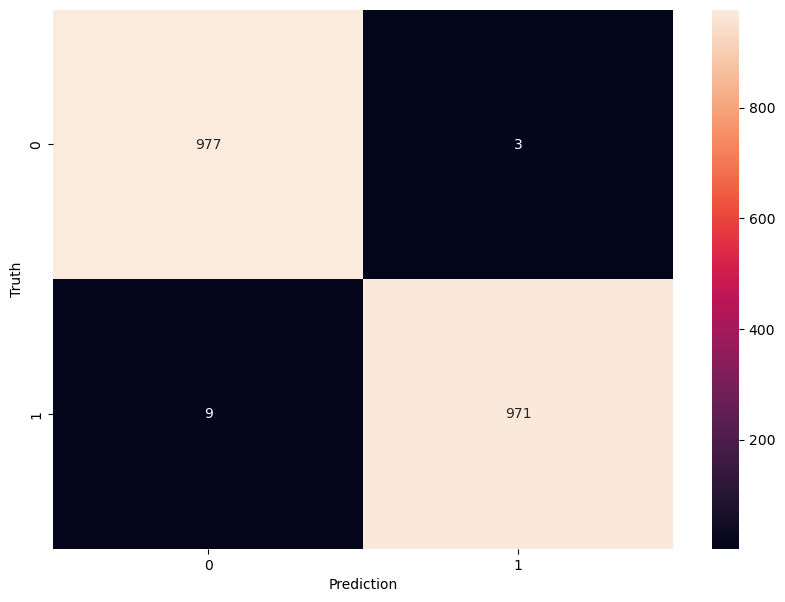

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## Please write down Final Observations

Final Observations
As machine learning algorithms do not work on text data directly, we need to convert them into numeric vectors and feed that into models while training.

In this process, we convert text into a very high dimensional numeric vector using the technique of Bag of words and we use sklearn CountVectorizer for this.

Without Pre-Processing Data

From the above in most of the cases, we can see that when we have the count vectorizer above trigrams or at trigrams, the performance keeps degrading. The major possible reason for this as the ngram_range keeps increasing, the number of dimensions/features (possible combination of words) also increases enormously and models have the risk of overfitting and resulting in terrible performance.

For this reason, models like KNN failed terribly when performed with trigrams and using the euclidean distance. K-Nearest Neighbours(KNN) doesn't work well with high-dimensional data because, with a large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of the model. It performed well for class 1 and had terrible results for Class 0.

Both recall and F1 scores increase better when trained with the same KNN model but with cosine distance as cosine distance does not get influenced by the number of dimensions as it uses the angle better the two text vectors to calculate the similarity.

With respect to Naive and RandomForest models, both performed really well, and random forest with trigrams has a better edge on the recall metric.

As Random Forest uses Bootstrapping(row and column Sampling) with many decision trees and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifying the categories.

The easy calculation of probabilities for the words in the corpus(Bag of words) and storing them in a contingency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.

With Pre-Processing Data

Have trained the best model RandomForest on the pre-processed data, but RandomForest with trigrams fails to produce the same results here.

But the same randomForest with Unigram to Trigram features helps to produce very amazing results and is tops in the entire list with very good F1 scores and Recall scores.

Machine Learning is like a trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which gives good results and satisfies the requirements like latency, interpretability, etc.